In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
data=pd.read_csv('SalesData.csv')
data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [14]:
data.shape

(500, 2)

In [15]:
data.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [16]:
data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

<Axes: xlabel='Temperature', ylabel='Revenue'>

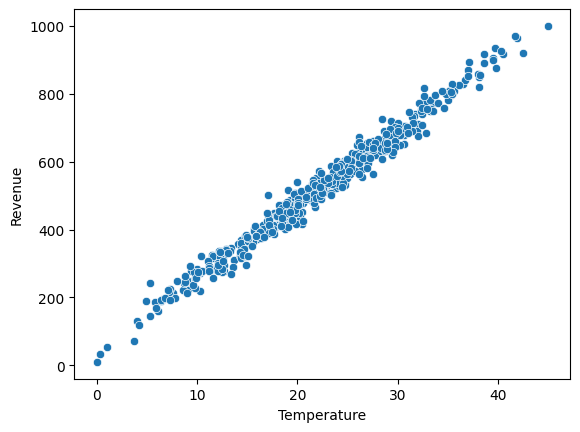

In [17]:
sns.scatterplot(data,x=data["Temperature"],y=data['Revenue'])

<Axes: >

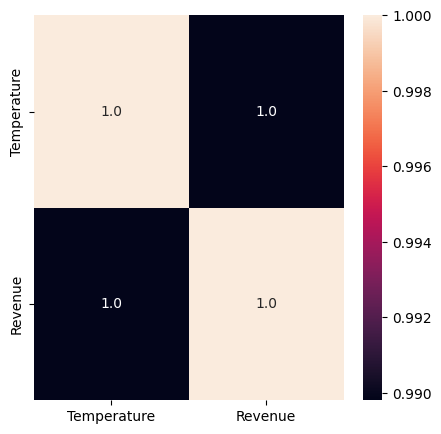

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

In [32]:
x=data.iloc[:,:1]

In [33]:
y=data['Revenue']

In [34]:
x

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((100, 1), (100,), (400, 1), (400,))

In [37]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)

In [38]:
y_pred=model.predict(x_test)
y_pred[:5]

array([305.98984148, 455.00982157, 546.42918244, 320.90447328,
       484.39455448])

In [39]:
data.head(2)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122


In [40]:
temp=[[24.566884]]
model.predict(temp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([572.71608349])

In [41]:
model.score(x_test,y_test)

0.9702826350873014

In [42]:
temp=[[26]]
model.predict(temp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([603.64943683])

In [48]:
###DEPLOYMENT####


In [50]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gradio-3.32.0-py3-none-any.whl (19.9 MB)
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━

In [51]:
import gradio as gr

In [52]:
import numpy as np


In [53]:
data.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [58]:
def rev(Temperature):
    x=np.array([Temperature])
    Revenue= model.predict(x.reshape(1,-1))
    return Revenue

In [55]:
data.head(2)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122


In [59]:
rev(24.566884)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([572.71608349])

In [ ]:
app=gr.Interface(fn=sp,
                 inputs=[gr.inputs.Number(label="Temperature"),
                        ],
          outputs=gr.outputs.Label(),
               title="A Predictive Model for Ice Cream Sales Prediction",share=True )
app.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)
<ipython-input-67-f9b5ddad35cb>:1: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'share': Tr

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>